In [1]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 96.6/96.6 KB 928.5 kB/s eta 0:00:00
     -------------------------------------- 78.4/78.4 KB 725.6 kB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 KB 1.5 MB/s eta 0:00:00
     -------------------------------------- 262.0/262.0 KB 1.2 MB/s eta 0:00:00


In [2]:
pwd

'C:\\Users\\pc\\Downloads'

In [3]:
!pip install wordcloud

     ------------------------------------ 220.7/220.7 KB 448.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 3.3/3.3 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 930.9/930.9 KB 2.0 MB/s eta 0:00:00
     -------------------------------------- 55.3/55.3 KB 479.5 kB/s eta 0:00:00
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'


  error: subprocess-exited-with-error
  
  Running setup.py install for wordcloud did not run successfully.
  exit code: 1
  
  [20 lines of output]
  running install
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.10
  creating build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\_version.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\__init__.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\__main__.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\stopwords -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64-3.10\wordcloud
  UPDATING build\lib.win-amd64-3.10\wordcloud/_

In [4]:
import nltk
import re

In [47]:
#nltk.download()

In [5]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [6]:
reviews = pd.read_csv("K8 Reviews.csv")

In [7]:
reviews.head(10)

sentiment                                             review
0          1             Good but need updates and improvements
1          0  Worst mobile i have bought ever, Battery is dr...
2          1  when I will get my 10% cash back.... its alrea...
3          1                                               Good
4          0  The worst phone everThey have changed the last...
5          0  Only I'm telling don't buyI'm totally disappoi...
6          1  Phone is awesome. But while charging, it heats...
7          0                    The battery level has worn down
8          0  It's over hitting problems...and phone hanging...
9          0  A lot of glitches dont buy this thing better g...

This dataset is scrapped from amazon about Lenevo K8 mobile phones.While the users gave the reviews, they also give the ratings
- Ratings 1,2,3 -> negitive sentiment has a value 0 in the sentiment column
- Ratings 4,5 -> positive sentiment has a value 1 in the sentiment column

In [8]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [9]:
reviews.shape

(14675, 2)

In [53]:
from wordcloud import WordCloud

In [54]:
reviews_combined = " ".join(reviews.review.values)

In [55]:
reviews_combined

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don\'t know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me. when I will get my 10% cash back.... its already 15 January.. Good The worst phone everThey have changed the last phone but the problem is still same and the amazon is not returning the phone .Highly disappointing of amazon Only I\'m telling don\'t buyI\'m totally disappointedPoor batteryPoor cameraWaste of money Phone is awesome. But while charging, it heats up allot..Really a genuine reason to hate Lenovo k8 note The battery level has worn down It\'s over hitting problems...an

In [56]:
reviews_combined = re.sub(r"[^\w\s]+"," ",reviews_combined)

In [57]:
#Total words in reviews
len(reviews_combined)

1659733

In [58]:
set(reviews_combined)

{' ',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'Ñ',
 'à',
 'â',
 'ï',
 'û',
 'आ',
 'इ',
 'ई',
 'औ',
 'क',
 'ख',
 'ग',
 'ट',
 'ठ',
 'ड',
 'त',
 'थ',
 'न',
 'प',
 'फ',
 'ब',
 'भ',
 'म',
 'य',
 'र',
 'ल',
 'व',
 'स',
 'ह',
 'ड़',
 'ஆ',
 'இ',
 'எ',
 'ஏ',
 'ஒ',
 'க',
 'ச',
 'ட',
 'ண',
 'த',
 'ந',
 'ன',
 'ப',
 'ம',
 'ய',
 'ர',
 'ற',
 'ல',
 'வ'}

In [59]:
reviews_combined[:200]

'Good but need updates and improvements Worst mobile i have bought ever  Battery is draining like hell  backup is only 6 to 7 hours with internet uses  even if I put mobile idle its getting discharged '

In [60]:
word_cloud = WordCloud().generate_from_text(reviews_combined)

In [61]:
#?WordCloud

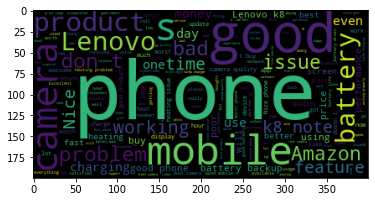

In [62]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

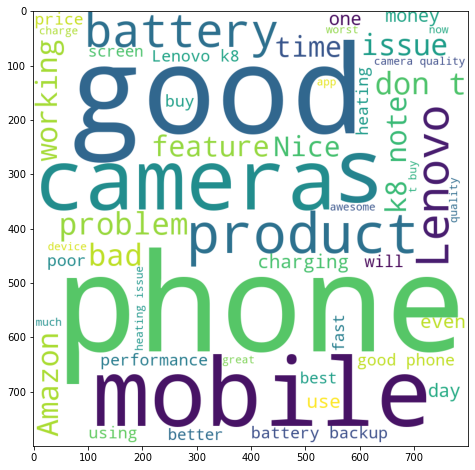

In [63]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words = 50,random_state = 500).\
generate_from_text(reviews_combined)
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [64]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [65]:
fdist.get('but',0)

2420

In [66]:
fdist

{'Good': 1449,
 'but': 2420,
 'need': 212,
 'updates': 131,
 'and': 5231,
 'improvements': 7,
 'Worst': 406,
 'mobile': 2079,
 'i': 955,
 'have': 1239,
 'bought': 282,
 'ever': 307,
 '': 30237,
 'Battery': 999,
 'is': 10181,
 'draining': 194,
 'like': 923,
 'hell': 40,
 'backup': 655,
 'only': 779,
 '6': 273,
 'to': 4649,
 '7': 180,
 'hours': 412,
 'with': 2419,
 'internet': 136,
 'uses': 24,
 'even': 689,
 'if': 550,
 'I': 4147,
 'put': 66,
 'idle': 69,
 'its': 714,
 'getting': 371,
 'discharged': 22,
 'This': 547,
 'biggest': 27,
 'lie': 6,
 'from': 898,
 'Amazon': 652,
 'Lenove': 3,
 'which': 491,
 'not': 5261,
 'at': 797,
 'all': 869,
 'expected': 207,
 'they': 452,
 'are': 1294,
 'making': 37,
 'full': 335,
 'by': 585,
 'saying': 34,
 'that': 1065,
 'battery': 2434,
 '4000MAH': 8,
 'booster': 6,
 'charger': 422,
 'fake': 61,
 'it': 4506,
 'takes': 280,
 'least': 36,
 '4': 634,
 '5': 596,
 'be': 635,
 'fully': 112,
 'charged': 133,
 'Don': 282,
 't': 1875,
 'know': 144,
 'how': 110

In [67]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

<AxesSubplot:xlabel='words'>

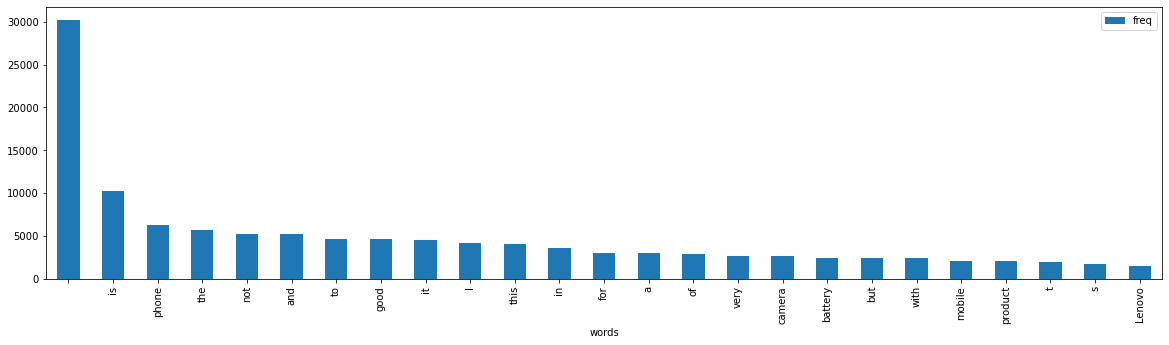

In [68]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

Problems with the above visuals
    1.case is non uniform
    2. punctuations and stop words
    3. words with different tense forms like charged, charging, charges has its root form in charge

In [69]:
#1. case normalization and tokenizing

In [70]:
reviews.review[:10]

0               Good but need updates and improvements
1    Worst mobile i have bought ever, Battery is dr...
2    when I will get my 10% cash back.... its alrea...
3                                                 Good
4    The worst phone everThey have changed the last...
5    Only I'm telling don't buyI'm totally disappoi...
6    Phone is awesome. But while charging, it heats...
7                      The battery level has worn down
8    It's over hitting problems...and phone hanging...
9    A lot of glitches dont buy this thing better g...
Name: review, dtype: object

In [71]:
from nltk.tokenize import word_tokenize

In [72]:
#All Reviews tokenized and in lower case
all_terms = word_tokenize(reviews_combined.lower())

In [73]:
print(all_terms[:20])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', 'battery', 'is', 'draining', 'like', 'hell', 'backup', 'is', 'only']


In [74]:
all_terms

['good',
 'but',
 'need',
 'updates',
 'and',
 'improvements',
 'worst',
 'mobile',
 'i',
 'have',
 'bought',
 'ever',
 'battery',
 'is',
 'draining',
 'like',
 'hell',
 'backup',
 'is',
 'only',
 '6',
 'to',
 '7',
 'hours',
 'with',
 'internet',
 'uses',
 'even',
 'if',
 'i',
 'put',
 'mobile',
 'idle',
 'its',
 'getting',
 'discharged',
 'this',
 'is',
 'biggest',
 'lie',
 'from',
 'amazon',
 'lenove',
 'which',
 'is',
 'not',
 'at',
 'all',
 'expected',
 'they',
 'are',
 'making',
 'full',
 'by',
 'saying',
 'that',
 'battery',
 'is',
 '4000mah',
 'booster',
 'charger',
 'is',
 'fake',
 'it',
 'takes',
 'at',
 'least',
 '4',
 'to',
 '5',
 'hours',
 'to',
 'be',
 'fully',
 'charged',
 'don',
 't',
 'know',
 'how',
 'lenovo',
 'will',
 'survive',
 'by',
 'making',
 'full',
 'of',
 'us',
 'please',
 'don',
 't',
 'go',
 'for',
 'this',
 'else',
 'you',
 'will',
 'regret',
 'like',
 'me',
 'when',
 'i',
 'will',
 'get',
 'my',
 '10',
 'cash',
 'back',
 'its',
 'already',
 '15',
 'januar

In [75]:
len(set(all_terms))

12582

In [77]:
len((all_terms))

301346

In [78]:
#visualizing the frequency distrinution

In [79]:
from nltk.probability import FreqDist

In [80]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'is': 10349, 'phone': 6979, 'the': 6702, 'good': 6138, 'not': 6125, 'it': 5766, 'and': 5569, 'i': 5102, 'to': 4712, 'this': 4670, ...})

In [81]:
fdist["processor"]

320

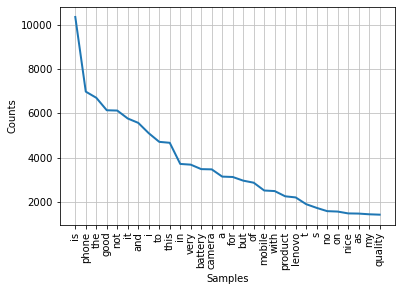

In [82]:
fdist.plot(30,cumulative=False)
plt.show()

In [83]:
from string import punctuation
from nltk.corpus import stopwords

In [84]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [85]:
stop_nltk = stopwords.words("english")
stop_nltk.remove('not')

In [86]:
stop_nltk

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [87]:
stop_updated = stop_nltk + list(punctuation) + ["..."] + ["phone", "mobile","lenovo","k8","product","n't","'s"] + ["...."] + [".."]

below code removes:
1. stopwords, 
2. punct's,
3. custom stop words,
4. words with length less than 2

In [88]:
reviews_updated = [word for word in all_terms if word not in stop_updated and len(word) >= 2]

In [89]:
print(reviews_updated[:20])

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'discharged']


In [90]:
len(reviews_updated)

168620

In [91]:
len(set(reviews_updated))

12373

In [92]:
reviewupdstr = " ".join(reviews_updated)

In [93]:
reviewupdstr

'good need updates improvements worst bought ever battery draining like hell backup hours internet uses even put idle getting discharged biggest lie amazon lenove not expected making full saying battery 4000mah booster charger fake takes least hours fully charged know survive making full us please go else regret like get 10 cash back already 15 january good worst everthey changed last problem still amazon not returning highly disappointing amazon telling buyi totally disappointedpoor batterypoor camerawaste money awesome charging heats allot really genuine reason hate note battery level worn hitting problems hanging problems note service station ahmedabad one years warranty change lot glitches dont buy thing better go options wrost good charger not working damage within months purchase item much heating battery life poor faced battery problem motherboard problem months worst life good slim good battry backup good screen love headset not available every time automatic kindly suggest bes

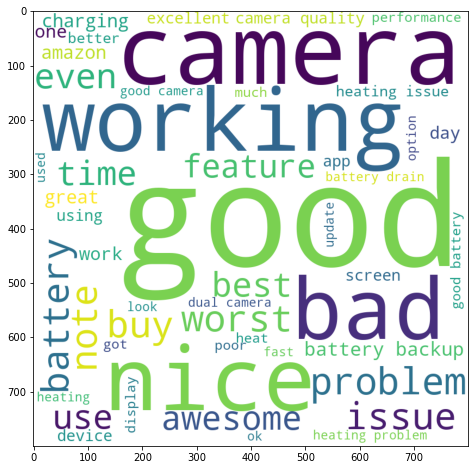

In [94]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words = 50,random_state = 500).\
generate_from_text(reviewupdstr)
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [95]:
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [96]:
reviews_updated_stem = [ stemmer_s.stem(word) for word in reviews_updated]

In [97]:
reviews_updated_stem

['good',
 'need',
 'updat',
 'improv',
 'worst',
 'bought',
 'ever',
 'batteri',
 'drain',
 'like',
 'hell',
 'backup',
 'hour',
 'internet',
 'use',
 'even',
 'put',
 'idl',
 'get',
 'discharg',
 'biggest',
 'lie',
 'amazon',
 'lenov',
 'not',
 'expect',
 'make',
 'full',
 'say',
 'batteri',
 '4000mah',
 'booster',
 'charger',
 'fake',
 'take',
 'least',
 'hour',
 'fulli',
 'charg',
 'know',
 'surviv',
 'make',
 'full',
 'us',
 'pleas',
 'go',
 'els',
 'regret',
 'like',
 'get',
 '10',
 'cash',
 'back',
 'alreadi',
 '15',
 'januari',
 'good',
 'worst',
 'everthey',
 'chang',
 'last',
 'problem',
 'still',
 'amazon',
 'not',
 'return',
 'high',
 'disappoint',
 'amazon',
 'tell',
 'buyi',
 'total',
 'disappointedpoor',
 'batterypoor',
 'camerawast',
 'money',
 'awesom',
 'charg',
 'heat',
 'allot',
 'realli',
 'genuin',
 'reason',
 'hate',
 'note',
 'batteri',
 'level',
 'worn',
 'hit',
 'problem',
 'hang',
 'problem',
 'note',
 'servic',
 'station',
 'ahmedabad',
 'one',
 'year',
 'war

In [98]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [99]:
reviews_updated_lemm = [ lemm.lemmatize(word,pos='v') for word in reviews_updated]

In [100]:
reviews_updated_lemm

['good',
 'need',
 'update',
 'improvements',
 'worst',
 'buy',
 'ever',
 'battery',
 'drain',
 'like',
 'hell',
 'backup',
 'hours',
 'internet',
 'use',
 'even',
 'put',
 'idle',
 'get',
 'discharge',
 'biggest',
 'lie',
 'amazon',
 'lenove',
 'not',
 'expect',
 'make',
 'full',
 'say',
 'battery',
 '4000mah',
 'booster',
 'charger',
 'fake',
 'take',
 'least',
 'hours',
 'fully',
 'charge',
 'know',
 'survive',
 'make',
 'full',
 'us',
 'please',
 'go',
 'else',
 'regret',
 'like',
 'get',
 '10',
 'cash',
 'back',
 'already',
 '15',
 'january',
 'good',
 'worst',
 'everthey',
 'change',
 'last',
 'problem',
 'still',
 'amazon',
 'not',
 'return',
 'highly',
 'disappoint',
 'amazon',
 'tell',
 'buyi',
 'totally',
 'disappointedpoor',
 'batterypoor',
 'camerawaste',
 'money',
 'awesome',
 'charge',
 'heat',
 'allot',
 'really',
 'genuine',
 'reason',
 'hate',
 'note',
 'battery',
 'level',
 'wear',
 'hit',
 'problems',
 'hang',
 'problems',
 'note',
 'service',
 'station',
 'ahmedabad

In [101]:
print(len(set(reviews_updated_stem)),len(set(reviews_updated_lemm)))

10047 10922


In [108]:
#Stemmer reduces the number of distinct words in the corpus to a greater exten

In [109]:
# Define function that takes in a raw string, returns a clean string
# - Tokenize, lower case, remove stop words, stem, stitch back to string
def clean_txtstem(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens if term not in stop_updated and len(term) > 1] 
    res = " ".join(stemmed)
    return res
def clean_txtlemma(sent):
    tokens = word_tokenize(sent.lower())
    lemmatized = [lemm.lemmatize(term, pos = 'v') for term in tokens if term not in stop_updated and len(term) > 1] 
    res = " ".join(lemmatized)
    return res

In [110]:
%%time
reviews['clean_reviewstem'] = reviews.review.apply(clean_txtstem)

Wall time: 5.71 s


In [111]:
%%time
reviews['clean_reviewlemm'] = reviews.review.apply(clean_txtlemma)

Wall time: 3.99 s


In [112]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                    clean_reviewstem  \
0                             good need updat improv   
1  worst bought ever batteri drain like hell back...   
2                get 10 cash back alreadi 15 januari   
3                                               good   
4  worst everthey chang last problem still amazon...   

                                    clean_reviewlemm  
0                      good need update improvements  
1  worst buy ever battery drain like hell backup ...  
2                get 10 cash back already 15 january  
3                                               good  
4  worst everthey change last problem still amazo...

In [113]:
#reviews = reviews.drop('clean_reviewlemm',axis = 1)
reviews

sentiment                                             review  \
0              1             Good but need updates and improvements   
1              0  Worst mobile i have bought ever, Battery is dr...   
2              1  when I will get my 10% cash back.... its alrea...   
3              1                                               Good   
4              0  The worst phone everThey have changed the last...   
...          ...                                                ...   
14670          1  I really like the phone, Everything is working...   
14671          1  The Lenovo K8 Note is awesome. It takes best p...   
14672          1                       Awesome Gaget.. @ this price   
14673          1  This phone is nice processing will be successf...   
14674          1      Good product but the pakeging was not enough.   

                                        clean_reviewstem  \
0                                 good need updat improv   
1      worst bought ever batteri drain like hell back...   
2                    get 10 cash back alreadi 15 januari   
3                                                   good   
4      worst everthey chang last problem still amazon...   
...                                                  ...   
14670           realli like everyth work fine whater use   
14671  note awesom take best pictur dual camera slim ...   
14672                                 awesom gaget price   
14673  nice process success dual camera not success d...   
14674                              good pakeg not enough   

                                        clean_reviewlemm  
0                          good need update improvements  
1      worst buy ever battery drain like hell backup ...  
2                    get 10 cash back already 15 january  
3                                                   good  
4      worst everthey change last problem still amazo...  
...                                                  ...  
14670        really like everything work fine whater use  
14671  note awesome take best picture dual camera sli...  
14672                                awesome gaget price  
14673  nice process successful dual camera not succes...  
14674                           good pakeging not enough  

[14675 rows x 4 columns]

# Word cloud on cleaned dataset

In [114]:
reviews_combinedstem = " ".join(reviews.clean_reviewstem.values)
reviews_combinedlemm = " ".join(reviews.clean_reviewlemm.values)

In [115]:
reviews_combinedstem

"good need updat improv worst bought ever batteri drain like hell backup hour internet use even put idl get discharged.thi biggest lie amazon lenov not expect make full say batteri 4000mah booster charger fake take least hour fulli charged.do know surviv make full us.pleas go els regret like get 10 cash back alreadi 15 januari good worst everthey chang last problem still amazon not return .high disappoint amazon 'm tell buyi 'm total disappointedpoor batterypoor camerawast money awesom charg heat allot realli genuin reason hate note batteri level worn hit problem hang problem note servic station ahmedabad one year warranti chang lot glitch dont buy thing better go option wrost good charger not work damag within month purchas item much heat batteri life poor face batteri problem motherboard problem month worst life good slim good battri backup good screen love headset not avail everi time automat kind suggest best accord prize rang specif comparison anoth rang bought amazon seal paid 10

In [116]:
word_cloud = WordCloud(width=800,height=400,background_color='white',max_words=50, random_state = 59,stopwords=[]).\
generate_from_text(reviews_combinedlemm)

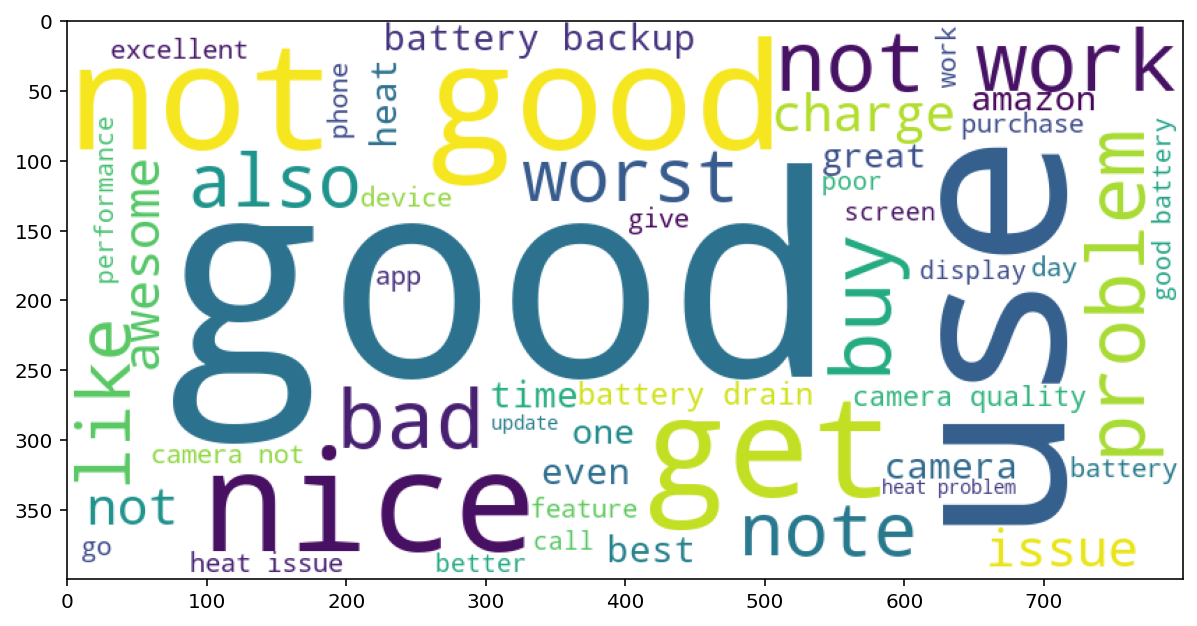

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.figure(figsize=[10,10])
plt.imshow(word_cloud)
plt.show()

In [118]:
from PIL import Image
mask = np.array(Image.open('download.jpg'))
wc = WordCloud(mask=mask, background_color="white",
               max_words=100, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(reviews_combinedlemm)
#plt.imshow(wc, interpolation="bilinear")
plt.imshow(wc)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'download.jpg'

# Bar Graph on top 25 words

In [ ]:
all_terms = []
fdist = {}
all_terms = reviews_combinedlemm.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [ ]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

In [ ]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

# Plot the bar graph for top 25 frequenctly used bigrams

In [126]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [127]:
# create a bigram count vectorizer object
bigram_count_vectorizer = CountVectorizer(ngram_range=(1,1),max_features = 100)
bigram_tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1),max_features = 100)

In [128]:
X_bigram = bigram_count_vectorizer.fit_transform(reviews['clean_reviewlemm'])
X_tfidfgram = bigram_tfidf_vectorizer.fit_transform(reviews['clean_reviewlemm'])
# Creating a DTM

DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())
TFidfunigram = pd.DataFrame(X_tfidfgram.todense(), columns=bigram_tfidf_vectorizer.get_feature_names())


In [129]:
X_bigram

<14675x100 sparse matrix of type '<class 'numpy.int64'>'
	with 69409 stored elements in Compressed Sparse Row format>

In [130]:
bigram_count_vectorizer.get_feature_names()

['10',
 'also',
 'amazon',
 'android',
 'app',
 'average',
 'awesome',
 'back',
 'backup',
 'bad',
 'battery',
 'best',
 'better',
 'buy',
 'call',
 'camera',
 'charge',
 'charger',
 'come',
 'compare',
 'day',
 'days',
 'device',
 'disappoint',
 'display',
 'drain',
 'dual',
 'even',
 'ever',
 'excellent',
 'expect',
 'experience',
 'fast',
 'feature',
 'front',
 'full',
 'game',
 'get',
 'give',
 'go',
 'good',
 'great',
 'hang',
 'heat',
 'hours',
 'issue',
 'last',
 'life',
 'like',
 'look',
 'lot',
 'low',
 'many',
 'mode',
 'money',
 'months',
 'much',
 'need',
 'network',
 'nice',
 'not',
 'note',
 'ok',
 'one',
 'option',
 'overall',
 'performance',
 'phone',
 'play',
 'please',
 'poor',
 'price',
 'problem',
 'processor',
 'properly',
 'purchase',
 'quality',
 'range',
 'really',
 'receive',
 'return',
 'screen',
 'service',
 'show',
 'sim',
 'software',
 'sound',
 'speaker',
 'super',
 'support',
 'take',
 'time',
 'turbo',
 'update',
 'use',
 'want',
 'waste',
 'work',
 'wor

In [131]:
DTM_bigram

10  also  amazon  android  app  average  awesome  back  backup  bad  \
0       0     0       0        0    0        0        0     0       0    0   
1       0     0       1        0    0        0        0     0       1    0   
2       1     0       0        0    0        0        0     1       0    0   
3       0     0       0        0    0        0        0     0       0    0   
4       0     0       2        0    0        0        0     0       0    0   
...    ..   ...     ...      ...  ...      ...      ...   ...     ...  ...   
14670   0     0       0        0    0        0        0     0       0    0   
14671   0     0       0        1    0        0        2     1       0    0   
14672   0     0       0        0    0        0        1     0       0    0   
14673   0     0       0        0    0        0        0     0       0    0   
14674   0     0       0        0    0        0        0     0       0    0   

       ...  take  time  turbo  update  use  want  waste  work  worst  worth  
0      ...     0     0      0       1    0     0      0     0      0      0  
1      ...     1     0      0       0    1     0      0     0      1      0  
2      ...     0     0      0       0    0     0      0     0      0      0  
3      ...     0     0      0       0    0     0      0     0      0      0  
4      ...     0     0      0       0    0     0      0     0      1      0  
...    ...   ...   ...    ...     ...  ...   ...    ...   ...    ...    ...  
14670  ...     0     0      0       0    1     0      0     1      0      0  
14671  ...     1     0      0       0    0     0      0     0      0      0  
14672  ...     0     0      0       0    0     0      0     0      0      0  
14673  ...     0     0      0       0    0     0      0     0      0      0  
14674  ...     0     0      0       0    0     0      0     0      0      0  

[14675 rows x 100 columns]

In [132]:
TFidfunigram

10  also    amazon   android  app  average   awesome      back  \
0      0.000000   0.0  0.000000  0.000000  0.0      0.0  0.000000  0.000000   
1      0.000000   0.0  0.176411  0.000000  0.0      0.0  0.000000  0.000000   
2      0.685443   0.0  0.000000  0.000000  0.0      0.0  0.000000  0.559949   
3      0.000000   0.0  0.000000  0.000000  0.0      0.0  0.000000  0.000000   
4      0.000000   0.0  0.625594  0.000000  0.0      0.0  0.000000  0.000000   
...         ...   ...       ...       ...  ...      ...       ...       ...   
14670  0.000000   0.0  0.000000  0.000000  0.0      0.0  0.000000  0.000000   
14671  0.000000   0.0  0.000000  0.350876  0.0      0.0  0.569624  0.288848   
14672  0.000000   0.0  0.000000  0.000000  0.0      0.0  0.733305  0.000000   
14673  0.000000   0.0  0.000000  0.000000  0.0      0.0  0.000000  0.000000   
14674  0.000000   0.0  0.000000  0.000000  0.0      0.0  0.000000  0.000000   

         backup  bad  ...      take  time  turbo    update       use  want  \
0      0.000000  0.0  ...  0.000000   0.0    0.0  0.628561  0.000000   0.0   
1      0.181517  0.0  ...  0.181925   0.0    0.0  0.000000  0.147548   0.0   
2      0.000000  0.0  ...  0.000000   0.0    0.0  0.000000  0.000000   0.0   
3      0.000000  0.0  ...  0.000000   0.0    0.0  0.000000  0.000000   0.0   
4      0.000000  0.0  ...  0.000000   0.0    0.0  0.000000  0.000000   0.0   
...         ...  ...  ...       ...   ...    ...       ...       ...   ...   
14670  0.000000  0.0  ...  0.000000   0.0    0.0  0.000000  0.440434   0.0   
14671  0.000000  0.0  ...  0.288087   0.0    0.0  0.000000  0.000000   0.0   
14672  0.000000  0.0  ...  0.000000   0.0    0.0  0.000000  0.000000   0.0   
14673  0.000000  0.0  ...  0.000000   0.0    0.0  0.000000  0.000000   0.0   
14674  0.000000  0.0  ...  0.000000   0.0    0.0  0.000000  0.000000   0.0   

       waste      work     worst  worth  
0        0.0  0.000000  0.000000    0.0  
1        0.0  0.000000  0.170549    0.0  
2        0.0  0.000000  0.000000    0.0  
3        0.0  0.000000  0.000000    0.0  
4        0.0  0.000000  0.302404    0.0  
...      ...       ...       ...    ...  
14670    0.0  0.425839  0.000000    0.0  
14671    0.0  0.000000  0.000000    0.0  
14672    0.0  0.000000  0.000000    0.0  
14673    0.0  0.000000  0.000000    0.0  
14674    0.0  0.000000  0.000000    0.0  

[14675 rows x 100 columns]

<AxesSubplot:>

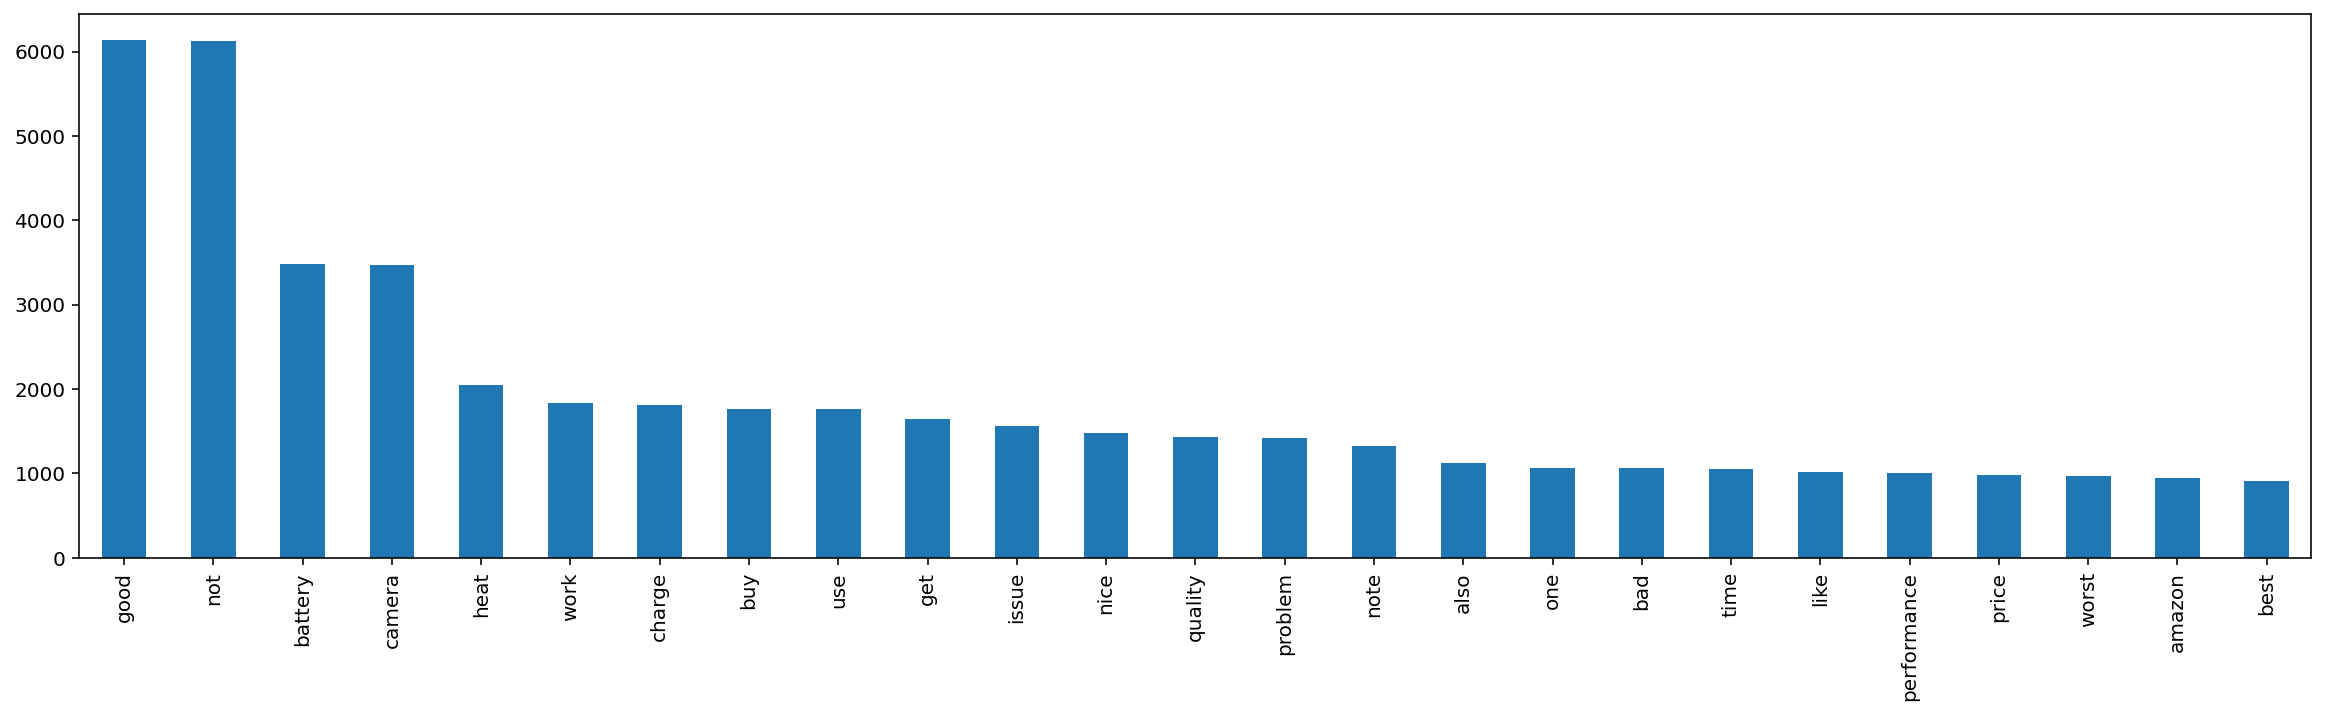

In [133]:
DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5)) 

In [134]:
DTM_bigram.sum()

10          297
also       1118
amazon      945
android     304
app         300
           ... 
want        315
waste       405
work       1837
worst       963
worth       316
Length: 100, dtype: int64

In the amazon case study dataset
Find the top 5 relavent reviews which has the below words
 - "battery drain"
 -"Good camera"
If there is a clash in the scores, review at index 0 has higher precedence than at index 1 and so on....

# Sentiment Classification

In [135]:
from sklearn.metrics import confusion_matrix, accuracy_score

### Sentiment Prediction Strategy : Making our own model

In [136]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                    clean_reviewstem  \
0                             good need updat improv   
1  worst bought ever batteri drain like hell back...   
2                get 10 cash back alreadi 15 januari   
3                                               good   
4  worst everthey chang last problem still amazon...   

                                    clean_reviewlemm  
0                      good need update improvements  
1  worst buy ever battery drain like hell backup ...  
2                get 10 cash back already 15 january  
3                                               good  
4  worst everthey change last problem still amazo...

In [137]:
X = reviews.clean_reviewlemm.values
y = reviews.sentiment.values

In [139]:
X[:5]

array(['good need update improvements',
       'worst buy ever battery drain like hell backup hours internet use even put idle get discharged.this biggest lie amazon lenove not expect make full say battery 4000mah booster charger fake take least hours fully charged.do know survive make full us.please go else regret like',
       'get 10 cash back already 15 january', 'good',
       'worst everthey change last problem still amazon not return .highly disappoint amazon'],
      dtype=object)

In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=4422)

In [143]:
X_train

array(['awesome', 'good camera good',
       'everything go nice little bother battery back not mark', ...,
       'best see till worth payment killer experience deca core processor feel good quality expect oreo update soon possible',
       'battery backup not good finger sensor performance poor',
       'worst hang start stage buy company'], dtype=object)

In [144]:
from sklearn.feature_extraction.text import CountVectorizer

In [146]:
vectorizer = CountVectorizer(max_features=100)

In [147]:
# Extarct the features and transform -> get the count of terms in every document
X_train_bow = vectorizer.fit_transform(X_train)

In [148]:
X_train_bow

<11740x100 sparse matrix of type '<class 'numpy.int64'>'
	with 55272 stored elements in Compressed Sparse Row format>

In [149]:
# Only transform -> get the count of terms in every document, the test data

X_test_bow = vectorizer.transform(X_test)

In [150]:
X_train_bow.shape, X_test_bow.shape

((11740, 100), (2935, 100))

In [151]:
X_train_bow

<11740x100 sparse matrix of type '<class 'numpy.int64'>'
	with 55272 stored elements in Compressed Sparse Row format>

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
logreg = LogisticRegression()

In [154]:
logreg.fit(X_train_bow,y_train)

LogisticRegression()

In [155]:
y_test_pred = logreg.predict(X_test_bow)

In [156]:
accuracy_score(y_test, y_test_pred)

0.852129471890971

In [157]:
confusion_matrix(y_test, y_test_pred)

array([[1306,  237],
       [ 197, 1195]], dtype=int64)

In [158]:
y_train_pred = logreg.predict(X_train_bow)
accuracy_score(y_train, y_train_pred)

0.8492333901192505

In [159]:
review1 = "bad phone, pathetic battery"
review2 = "amazing phone, great camera"
review3 = "kjshfui ofnsu shfiousnfns"
review4 = "good camera bad battery"

In [160]:
lreview= [review1,review2,review3,review4]
conrev = vectorizer.transform(lreview)
sentpred = logreg.predict(conrev)

In [161]:
sentpred

array([0, 1, 1, 0], dtype=int64)

#### Sentiment classification using tfidfvectorizer

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [132]:
vectorizer = TfidfVectorizer(max_features=1500)

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=1409)

In [139]:
# Extarct the features and transform -> get the count of terms in every document
X_train_bow = vectorizer.fit_transform(X_train)

In [140]:
# Only transform -> get the count of terms in every document, the test data
X_test_bow = vectorizer.transform(X_test)

In [141]:
X_train_bow.shape, X_test_bow.shape

((11740, 2000), (2935, 2000))

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
logreg = LogisticRegression()

In [144]:
logreg.fit(X_train_bow,y_train)

LogisticRegression()

In [145]:
y_test_pred = logreg.predict(X_test_bow)

In [146]:
accuracy_score(y_test, y_test_pred)

0.8770017035775127

In [147]:
y_train_pred = logreg.predict(X_train_bow)
accuracy_score(y_train, y_train_pred)

0.8948892674616695

### Cosine Similarity

In [167]:
from sklearn.metrics.pairwise import cosine_similarity

In [168]:
tfidfvectorizer = CountVectorizer(max_features=10)

In [169]:
X = tfidfvectorizer.fit_transform(reviews['clean_reviewlemm'])
df_tfidf = pd.DataFrame(X.toarray(),columns=tfidfvectorizer.get_feature_names())

In [170]:
df_tfidf

battery  buy  camera  charge  get  good  heat  not  use  work
0            0    0       0       0    0     1     0    0    0     0
1            2    1       0       0    1     0     0    1    1     0
2            0    0       0       0    1     0     0    0    0     0
3            0    0       0       0    0     1     0    0    0     0
4            0    0       0       0    0     0     0    1    0     0
...        ...  ...     ...     ...  ...   ...   ...  ...  ...   ...
14670        0    0       0       0    0     0     0    0    1     1
14671        1    0       1       0    0     0     0    0    0     0
14672        0    0       0       0    0     0     0    0    0     0
14673        0    0       1       0    0     0     0    1    0     0
14674        0    0       0       0    0     1     0    1    0     0

[14675 rows x 10 columns]

In [171]:
#Check the cosine similarity with the second and the third reviews
cosine_similarity(df_tfidf[1:2], df_tfidf[2:3])

array([[0.35355339]])

In [173]:
cs = cosine_similarity(df_tfidf)

In [174]:
cswords=cosine_similarity(df_tfidf.T)

In [175]:
cs

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.70710678],
       [0.        , 1.        , 0.35355339, ..., 0.        , 0.25      ,
        0.25      ],
       [0.        , 0.35355339, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.25      , 0.        , ..., 0.        , 1.        ,
        0.5       ],
       [0.70710678, 0.25      , 0.        , ..., 0.        , 0.5       ,
        1.        ]])

In [176]:
sim_mat = pd.DataFrame(cs)

In [251]:
sim_mat

0         1         2        3         4      5         6      \
0      1.000000  0.000000  0.000000  0.57735  0.000000    0.0  0.000000   
1      0.000000  1.000000  0.051917  0.00000  0.152388    0.0  0.000000   
2      0.000000  0.051917  1.000000  0.00000  0.000000    0.0  0.000000   
3      0.577350  0.000000  0.000000  1.00000  0.000000    0.0  0.000000   
4      0.000000  0.152388  0.000000  0.00000  1.000000    0.0  0.000000   
...         ...       ...       ...      ...       ...    ...       ...   
14670  0.000000  0.168232  0.000000  0.00000  0.000000    0.0  0.144338   
14671  0.000000  0.077876  0.071429  0.00000  0.000000    0.0  0.200446   
14672  0.000000  0.000000  0.000000  0.00000  0.000000    0.0  0.250000   
14673  0.000000  0.048564  0.000000  0.00000  0.098058    0.0  0.000000   
14674  0.333333  0.079305  0.000000  0.57735  0.160128    0.0  0.000000   

          7         8         9      ...  14665     14666     14667     14668  \
0      0.000000  0.000000  0.000000  ...    0.0  0.000000  0.000000  0.408248   
1      0.194257  0.000000  0.103835  ...    0.0  0.049341  0.000000  0.097129   
2      0.000000  0.000000  0.000000  ...    0.0  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  ...    0.0  0.000000  0.000000  0.707107   
4      0.000000  0.076923  0.000000  ...    0.0  0.149441  0.000000  0.196116   
...         ...       ...       ...  ...    ...       ...       ...       ...   
14670  0.000000  0.000000  0.000000  ...    0.0  0.000000  0.000000  0.000000   
14671  0.133631  0.052414  0.000000  ...    0.0  0.000000  0.000000  0.000000   
14672  0.000000  0.000000  0.000000  ...    0.0  0.000000  0.000000  0.000000   
14673  0.000000  0.000000  0.000000  ...    0.0  0.000000  0.353553  0.250000   
14674  0.000000  0.000000  0.000000  ...    0.0  0.000000  0.000000  0.816497   

          14669     14670     14671     14672     14673     14674  
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.333333  
1      0.274721  0.168232  0.077876  0.000000  0.048564  0.079305  
2      0.000000  0.000000  0.071429  0.000000  0.000000  0.000000  
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.577350  
4      0.000000  0.000000  0.000000  0.000000  0.098058  0.160128  
...         ...       ...       ...       ...       ...       ...  
14670  0.000000  1.000000  0.000000  0.000000  0.000000  0.000000  
14671  0.188982  0.000000  1.000000  0.267261  0.200446  0.000000  
14672  0.000000  0.000000  0.267261  1.000000  0.000000  0.000000  
14673  0.000000  0.000000  0.200446  0.000000  1.000000  0.204124  
14674  0.000000  0.000000  0.000000  0.000000  0.204124  1.000000  

[14675 rows x 14675 columns]

In [260]:
simmatwords = pd.DataFrame(cswords,columns=tfidfvectorizer.get_feature_names(),index=tfidfvectorizer.get_feature_names())

In [261]:
simmatwords

000        09        10       100      1000       10k        11  \
000      1.000000  0.000000  0.011917  0.000000  0.000000  0.000000  0.062994   
09       0.000000  1.000000  0.071604  0.000000  0.000000  0.000000  0.000000   
10       0.011917  0.071604  1.000000  0.092333  0.010509  0.029190  0.052547   
100      0.000000  0.000000  0.092333  1.000000  0.000000  0.033473  0.036155   
1000     0.000000  0.000000  0.010509  0.000000  1.000000  0.000000  0.000000   
...           ...       ...       ...       ...       ...       ...       ...   
yet      0.000000  0.000000  0.079277  0.000000  0.000000  0.000000  0.029934   
you      0.000000  0.000000  0.017162  0.029520  0.000000  0.000000  0.045361   
youtube  0.000000  0.000000  0.049948  0.021479  0.000000  0.000000  0.066010   
zero     0.000000  0.000000  0.010509  0.018078  0.000000  0.000000  0.000000   
zoom     0.000000  0.000000  0.033234  0.000000  0.000000  0.032530  0.000000   

         11999      11k        12  ...      year     years   yellow       yes  \
000        0.0  0.00000  0.066299  ...  0.000000  0.000000  0.00000  0.036711   
09         0.0  0.00000  0.028456  ...  0.028456  0.000000  0.00000  0.000000   
10         0.0  0.00000  0.099548  ...  0.005530  0.018594  0.00997  0.042872   
100        0.0  0.00000  0.076104  ...  0.000000  0.015992  0.00000  0.010535   
1000       0.0  0.00000  0.029235  ...  0.000000  0.000000  0.00000  0.000000   
...        ...      ...       ...  ...       ...       ...      ...       ...   
yet        0.0  0.00000  0.047257  ...  0.015752  0.000000  0.00000  0.000000   
you        0.0  0.00000  0.023870  ...  0.000000  0.000000  0.00000  0.000000   
youtube    0.0  0.08444  0.052105  ...  0.000000  0.000000  0.00000  0.057703   
zero       0.0  0.00000  0.000000  ...  0.029235  0.000000  0.00000  0.000000   
zoom       0.0  0.00000  0.000000  ...  0.000000  0.000000  0.00000  0.000000   

         yesterday       yet       you   youtube      zero      zoom  
000       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
09        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
10        0.021150  0.079277  0.017162  0.049948  0.010509  0.033234  
100       0.024254  0.000000  0.029520  0.021479  0.018078  0.000000  
1000      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
...            ...       ...       ...       ...       ...       ...  
yet       0.000000  1.000000  0.000000  0.053351  0.029934  0.000000  
you       0.000000  0.000000  1.000000  0.000000  0.000000  0.000000  
youtube   0.022140  0.053351  0.000000  1.000000  0.000000  0.000000  
zero      0.000000  0.029934  0.000000  0.000000  1.000000  0.000000  
zoom      0.000000  0.000000  0.000000  0.000000  0.000000  1.000000  

[1500 rows x 1500 columns]

In [252]:
#14668,4th

In [253]:
reviews.iloc[3]

sentiment              1
review              Good
clean_reviewstem    good
clean_reviewlemm    good
clean_review_new    good
Name: 3, dtype: object

In [254]:
reviews.iloc[14668]

sentiment                      0
review              Not so good.
clean_reviewstem        not good
clean_reviewlemm        not good
clean_review_new        not good
Name: 14668, dtype: object

In [255]:
def get_similar_words(input_word, sim_mat):
    cos_vals = sim_mat[input_word].sort_values(ascending=False)
    similar_words = cos_vals.drop(input_word).head(5)
    return similar_words

In [266]:
sim_mat = cosine_similarity(df_tfidf.T)

sim_mat = pd.DataFrame(sim_mat, columns= df_tfidf.columns, index= df_tfidf.columns)

get_similar_words('youtube', simmatwords)

watch     0.229447
play      0.221519
video     0.203131
con       0.159009
videos    0.156672
Name: youtube, dtype: float64

In [257]:
#Understanding how the function works
sim_mat['charge'].sort_values(ascending=False).drop('charge').head(5)

take       0.454877
turbo      0.415172
hours      0.376974
battery    0.356108
fast       0.308958
Name: charge, dtype: float64

# Sentiment Classification using AFINN

In [215]:
afinn = pd.read_csv("AFINN165.txt", sep="\t", header=None)
afinn.columns = ['Term','Score']
term_scores = dict(afinn.values)

In [216]:
def get_sentiment(sent):
    tokens = word_tokenize(sent.lower())
    score = 0
    for term in tokens:
        score += term_scores.get(term,0)
    return score

In [217]:
reviews['sent_scoreafinn'] = reviews.clean_reviewlemm.apply(get_sentiment)

In [218]:
reviews.head(10)

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   
5          0  Only I'm telling don't buyI'm totally disappoi...   
6          1  Phone is awesome. But while charging, it heats...   
7          0                    The battery level has worn down   
8          0  It's over hitting problems...and phone hanging...   
9          0  A lot of glitches dont buy this thing better g...   

                                    clean_reviewstem  \
0                             good need updat improv   
1  worst bought ever batteri drain like hell back...   
2                get 10 cash back alreadi 15 januari   
3                                               good   
4  worst everthey chang last problem still amazon...   
5  'm tell buyi 'm total disappointedpoor battery...   
6  awesom charg heat allot realli genuin reason h...   
7                                 batteri level worn   
8  hit problem hang problem note servic station a...   
9         lot glitch dont buy thing better go option   

                                    clean_reviewlemm  sent_predictionafinn  \
0                      good need update improvements                     1   
1  worst buy ever battery drain like hell backup ...                     0   
2                get 10 cash back already 15 january                     0   
3                                               good                     1   
4  worst everthey change last problem still amazo...                     0   
5  'm tell buyi 'm totally disappointedpoor batte...                     0   
6  awesome charge heat allot really genuine reaso...                     0   
7                                 battery level wear                     0   
8  hit problems hang problems note service statio...                     0   
9      lot glitches dont buy thing better go options                     0   

   score_vader  sent_prediction_vader  sent_scoreafinn  
0       0.5994                      1                3  
1      -0.8720                      0               -8  
2       0.0000                      0                0  
3       0.4404                      1                3  
4      -0.8289                      0               -7  
5       0.0000                      0                0  
6      -0.5423                      0                1  
7      -0.2960                      0                0  
8      -0.4019                      0               -4  
9       0.4404                      1                2

In [219]:
reviews.iloc[1].clean_reviewlemm

'worst buy ever battery drain like hell backup hours internet use even put idle get discharged.this biggest lie amazon lenove not expect make full say battery 4000mah booster charger fake take least hours fully charged.do know survive make full us.please go else regret like'

In [220]:
reviews['sent_predictionafinn'] = reviews.sent_scoreafinn.apply(lambda x:1 if x>2 else 0)

In [221]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                    clean_reviewstem  \
0                             good need updat improv   
1  worst bought ever batteri drain like hell back...   
2                get 10 cash back alreadi 15 januari   
3                                               good   
4  worst everthey chang last problem still amazon...   

                                    clean_reviewlemm  sent_predictionafinn  \
0                      good need update improvements                     1   
1  worst buy ever battery drain like hell backup ...                     0   
2                get 10 cash back already 15 january                     0   
3                                               good                     1   
4  worst everthey change last problem still amazo...                     0   

   score_vader  sent_prediction_vader  sent_scoreafinn  
0       0.5994                      1                3  
1      -0.8720                      0               -8  
2       0.0000                      0                0  
3       0.4404                      1                3  
4      -0.8289                      0               -7

In [222]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(reviews.sentiment,reviews.sent_predictionafinn)

array([[5821, 1891],
       [1460, 5503]], dtype=int64)

In [223]:
accuracy_score(reviews.sentiment,reviews.sent_predictionafinn)

0.7716524701873936

# Sentiment Classification using VADER

In [224]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [225]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [226]:
reviews['score_vader'] = reviews.review.apply(get_vader_sentiment)
#Applying on raw data to also allow for weightages of smileys

In [227]:
reviews.head(20)

sentiment                                             review  \
0           1             Good but need updates and improvements   
1           0  Worst mobile i have bought ever, Battery is dr...   
2           1  when I will get my 10% cash back.... its alrea...   
3           1                                               Good   
4           0  The worst phone everThey have changed the last...   
5           0  Only I'm telling don't buyI'm totally disappoi...   
6           1  Phone is awesome. But while charging, it heats...   
7           0                    The battery level has worn down   
8           0  It's over hitting problems...and phone hanging...   
9           0  A lot of glitches dont buy this thing better g...   
10          0                                              Wrost   
11          1  Good phone but charger not working / damage wi...   
12          0  Don't purchase this item, It is so much of hea...   
13          0  I have faced the battery problem and motherboa...   
14          1  Very good phone slim good battry backup good s...   
15          0                           headset is not available   
16          0  every time automatic on and off so kindly sugg...   
17          1  Best product according to their prize range an...   
18          0  Battery draining very rapidly I don't know why...   
19          1                                    Good smartphone   

                                     clean_reviewstem  \
0                              good need updat improv   
1   worst bought ever batteri drain like hell back...   
2                 get 10 cash back alreadi 15 januari   
3                                                good   
4   worst everthey chang last problem still amazon...   
5   'm tell buyi 'm total disappointedpoor battery...   
6   awesom charg heat allot realli genuin reason h...   
7                                  batteri level worn   
8   hit problem hang problem note servic station a...   
9          lot glitch dont buy thing better go option   
10                                              wrost   
11           good charger not work damag within month   
12           purchas item much heat batteri life poor   
13  face batteri problem motherboard problem month...   
14      good slim good battri backup good screen love   
15                                  headset not avail   
16                    everi time automat kind suggest   
17  best accord prize rang specif comparison anoth...   
18  batteri drain rapid know tell possibl solut ba...   
19                                     good smartphon   

                                     clean_reviewlemm  sent_predictionafinn  \
0                       good need update improvements                     1   
1   worst buy ever battery drain like hell backup ...                     0   
2                 get 10 cash back already 15 january                     0   
3                                                good                     1   
4   worst everthey change last problem still amazo...                     0   
5   'm tell buyi 'm totally disappointedpoor batte...                     0   
6   awesome charge heat allot really genuine reaso...                     0   
7                                  battery level wear                     0   
8   hit problems hang problems note service statio...                     0   
9       lot glitches dont buy thing better go options                     0   
10                                              wrost                     0   
11         good charger not work damage within months                     0   
12          purchase item much heat battery life poor                     0   
13  face battery problem motherboard problem month...                     0   
14      good slim good battry backup good screen love                     1   
15                              headset not available                     0   
16                every time autom

In [228]:
reviews['sent_prediction_vader'] = reviews.score_vader.\
apply(lambda x:1 if x>0.1 else 0)

In [229]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                    clean_reviewstem  \
0                             good need updat improv   
1  worst bought ever batteri drain like hell back...   
2                get 10 cash back alreadi 15 januari   
3                                               good   
4  worst everthey chang last problem still amazon...   

                                    clean_reviewlemm  sent_predictionafinn  \
0                      good need update improvements                     1   
1  worst buy ever battery drain like hell backup ...                     0   
2                get 10 cash back already 15 january                     0   
3                                               good                     1   
4  worst everthey change last problem still amazo...                     0   

   score_vader  sent_prediction_vader  sent_scoreafinn  
0       0.5994                      1                3  
1      -0.8720                      0               -8  
2       0.0000                      0                0  
3       0.4404                      1                3  
4      -0.8289                      0               -7

In [230]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_vader)

0.7894378194207836

In [231]:
confusion_matrix(reviews.sentiment,reviews.sent_prediction_vader)

array([[5855, 1857],
       [1233, 5730]], dtype=int64)

In [232]:
#on the lemmatized data, let's check the results
reviews.drop('sent_scoreafinn', axis=1, inplace=True)
reviews.drop('sent_predictionafinn', axis=1, inplace=True)
reviews.drop('score_vader', axis=1, inplace=True)
reviews.drop('sent_prediction_vader', axis=1, inplace=True)

In [234]:
reviews['lemm_vader'] = reviews.clean_reviewlemm.apply(get_vader_sentiment)
reviews['predlemm_vader'] = reviews.lemm_vader.apply(lambda x:1 if x>0.1 else 0)

In [236]:
reviews.head(20)

sentiment                                             review  \
0           1             Good but need updates and improvements   
1           0  Worst mobile i have bought ever, Battery is dr...   
2           1  when I will get my 10% cash back.... its alrea...   
3           1                                               Good   
4           0  The worst phone everThey have changed the last...   
5           0  Only I'm telling don't buyI'm totally disappoi...   
6           1  Phone is awesome. But while charging, it heats...   
7           0                    The battery level has worn down   
8           0  It's over hitting problems...and phone hanging...   
9           0  A lot of glitches dont buy this thing better g...   
10          0                                              Wrost   
11          1  Good phone but charger not working / damage wi...   
12          0  Don't purchase this item, It is so much of hea...   
13          0  I have faced the battery problem and motherboa...   
14          1  Very good phone slim good battry backup good s...   
15          0                           headset is not available   
16          0  every time automatic on and off so kindly sugg...   
17          1  Best product according to their prize range an...   
18          0  Battery draining very rapidly I don't know why...   
19          1                                    Good smartphone   

                                     clean_reviewstem  \
0                              good need updat improv   
1   worst bought ever batteri drain like hell back...   
2                 get 10 cash back alreadi 15 januari   
3                                                good   
4   worst everthey chang last problem still amazon...   
5   'm tell buyi 'm total disappointedpoor battery...   
6   awesom charg heat allot realli genuin reason h...   
7                                  batteri level worn   
8   hit problem hang problem note servic station a...   
9          lot glitch dont buy thing better go option   
10                                              wrost   
11           good charger not work damag within month   
12           purchas item much heat batteri life poor   
13  face batteri problem motherboard problem month...   
14      good slim good battri backup good screen love   
15                                  headset not avail   
16                    everi time automat kind suggest   
17  best accord prize rang specif comparison anoth...   
18  batteri drain rapid know tell possibl solut ba...   
19                                     good smartphon   

                                     clean_reviewlemm  lemm_vader  \
0                       good need update improvements      0.6369   
1   worst buy ever battery drain like hell backup ...     -0.8720   
2                 get 10 cash back already 15 january      0.0000   
3                                                good      0.4404   
4   worst everthey change last problem still amazo...     -0.4451   
5   'm tell buyi 'm totally disappointedpoor batte...      0.0000   
6   awesome charge heat allot really genuine reaso...      0.0352   
7                                  battery level wear      0.0000   
8   hit problems hang problems note service statio...     -0.6597   
9       lot glitches dont buy thing better go options     -0.3412   
10                                              wrost      0.0000   
11         good charger not work damage within months      0.6734   
12          purchase item much heat battery life poor     -0.4767   
13  face battery problem motherboard problem month...     -0.8591   
14      good slim good battry backup good screen love      0.9169   
15                              headset not available      0.0000   
16                every time automatic kindly suggest      0.4939   
17  best accord prize range specification comparis...      0.9423   
18  battery drain rapidly know tell possible solut...      0.1779 

In [237]:
accuracy_score(reviews.sentiment,reviews.predlemm_vader)

0.7883475298126065

In [238]:
confusion_matrix(reviews.sentiment,reviews.predlemm_vader)

array([[5611, 2101],
       [1005, 5958]], dtype=int64)